In [31]:
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import statsmodels.api as sns
import seaborn as sns
import matplotlib.pyplot as plt

## Instruction
1. download data csv from https://data.boston.gov/dataset/approved-building-permits
2. changed the file name into "building_permits.csv"
3. create a folder in your drive and name is "CS506Proj"
4. put in the csv file in there and run the code bellow

# Code processing

In [32]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
df = pd.read_csv('/content/drive/My Drive/CS506Proj/building_permits.csv')
# Reading the data from github
# df = pd.read_csv('../data/building_permits.csv')

<ipython-input-33-a787f16ad86d>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/CS506Proj/building_permits.csv')


In [34]:
df.head()
print(df.head(), "\n")
print("rows + collumn", "\n", df.shape)

  permitnumber worktype           permittypedescr             description  \
0     A1000569   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
1      A100071      COB  Amendment to a Long Form          City of Boston   
2     A1001012    OTHER  Amendment to a Long Form                   Other   
3     A1001201   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
4      A100137   EXTREN  Amendment to a Long Form  Renovations - Exterior   

                                            comments          applicant  \
0  This work is to Amend Permit ALT347244. Elimin...    Patrick Sharkey   
1  Change connector link layout from attached enc...  Renee Santeusanio   
2  Amend Alt943748 to erect a roof deck as per pl...   Jusimar Oliveria   
3  Build steel balcony over garden level with sta...      Andreas Hwang   
4  Landscaping/stonework - amending permit #2801/...                NaN   

  declared_valuation total_fees             issued_date  \
0         $36,500.00    $39

Checking for null values

In [35]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n", null_counts)

# Drop rows with missing values
df.dropna(inplace=True)

# Check again for null values
null_counts = df.isnull().sum()
print("\nNumber of null values in each column after cleaning:\n", null_counts)

Number of null values in each column:
 permitnumber              0
worktype               4541
permittypedescr           0
description            4541
comments                207
applicant              8824
declared_valuation        0
total_fees                0
issued_date               0
expiration_date       25590
status                    0
owner                 14593
occupancytype          1929
sq_feet                   0
address                6957
city                    185
state                     0
zip                     418
property_id           10625
parcel_id             14593
gpsy                  14463
gpsx                  14463
geom_point_2249       14463
geom_point_4326       14463
dtype: int64

Number of null values in each column after cleaning:
 permitnumber          0
worktype              0
permittypedescr       0
description           0
comments              0
applicant             0
declared_valuation    0
total_fees            0
issued_date           0
expir

  Reformating value

In [36]:
df['declared_valuation'] = df['declared_valuation'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['total_fees'] = df['total_fees'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [37]:
unique_zip_codes = df['zip'].unique()
zip_total = df.groupby('zip').size().sort_values(ascending=False)

zip_total_max = df.groupby('zip').size().max()
zip_total

zip
2116.0    36184
2130.0    28131
2124.0    27558
2131.0    24035
2132.0    22858
          ...  
2158.0        2
02103         1
01803         1
08091         1
8             1
Length: 75, dtype: int64

Total Fees

In [38]:
# Print  import matplotlib.pyplot as plt print(df['total_fees'].describe()) in 3 significant figures

import matplotlib.pyplot as plt
print(df['total_fees'].describe().round(3))


count    5.558150e+05
mean     9.165020e+02
std      2.602297e+04
min      0.000000e+00
25%      3.220000e+01
50%      7.000000e+01
75%      1.900000e+02
max      1.308042e+07
Name: total_fees, dtype: float64


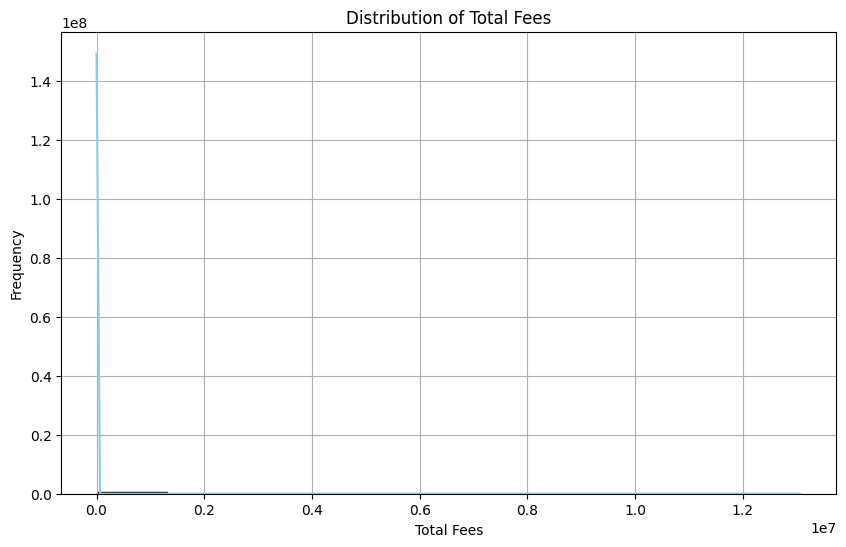

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'total_fees' is a column in it

# Generate the distribution graph for 'total_fees'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_fees'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Total Fees')
plt.xlabel('Total Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Declared Valuation

In [40]:

import matplotlib.pyplot as plt
print(df['declared_valuation'].describe().round(3))

count    5.558150e+05
mean     1.166506e+05
std      4.040626e+06
min     -1.000000e+06
25%      1.500000e+03
50%      5.500000e+03
75%      2.000000e+04
max      2.100000e+09
Name: declared_valuation, dtype: float64


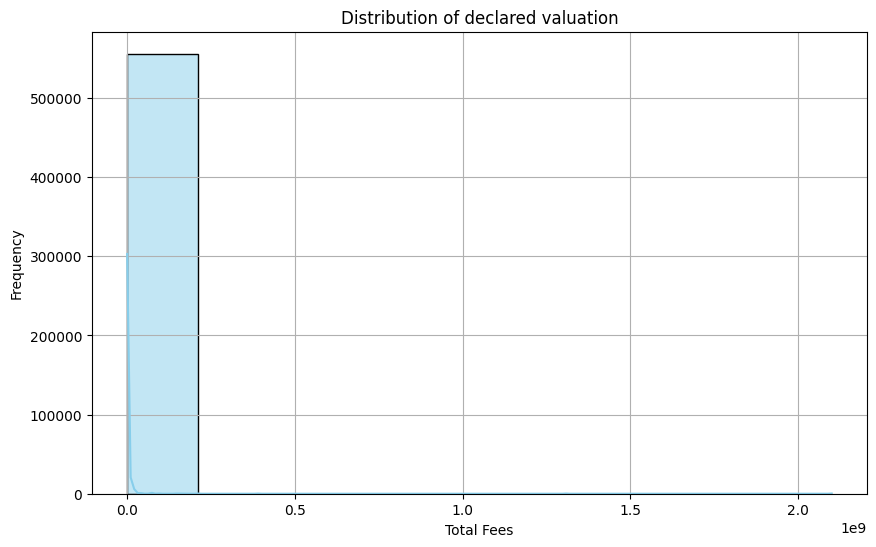

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the distribution graph for 'total_fees'
plt.figure(figsize=(10, 6))
sns.histplot(df['declared_valuation'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of declared valuation')
plt.xlabel('Total Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
# Check how many zip are there and check the total of zip for each different zip
, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Count the number of unique zip codes
unique_zip_codes = df['zip'].unique()
num_unique_zip_codes = len(unique_zip_codes)
print(f"Number of unique zip codes: {num_unique_zip_codes}")

# Calculate the total fees for each zip code
zip_totals = df.groupby('zip')['total_fees'].sum()

# Print the total fees for each zip code
print(f"Total fees for each zip code:\n{zip_totals}")
print(f"Max zip code:\n{zip_totals.max()}")

Number of unique zip codes: 75
Total fees for each zip code:
zip
1803.0       11484.80
2103.0         176.75
2104.0         307.00
2108.0     9361733.57
2109.0    14252386.35
             ...     
02210     25391819.00
02215     26756877.50
02467      1568767.00
08091           75.00
8               90.00
Name: total_fees, Length: 75, dtype: float64
Max zip code:
37602136.76


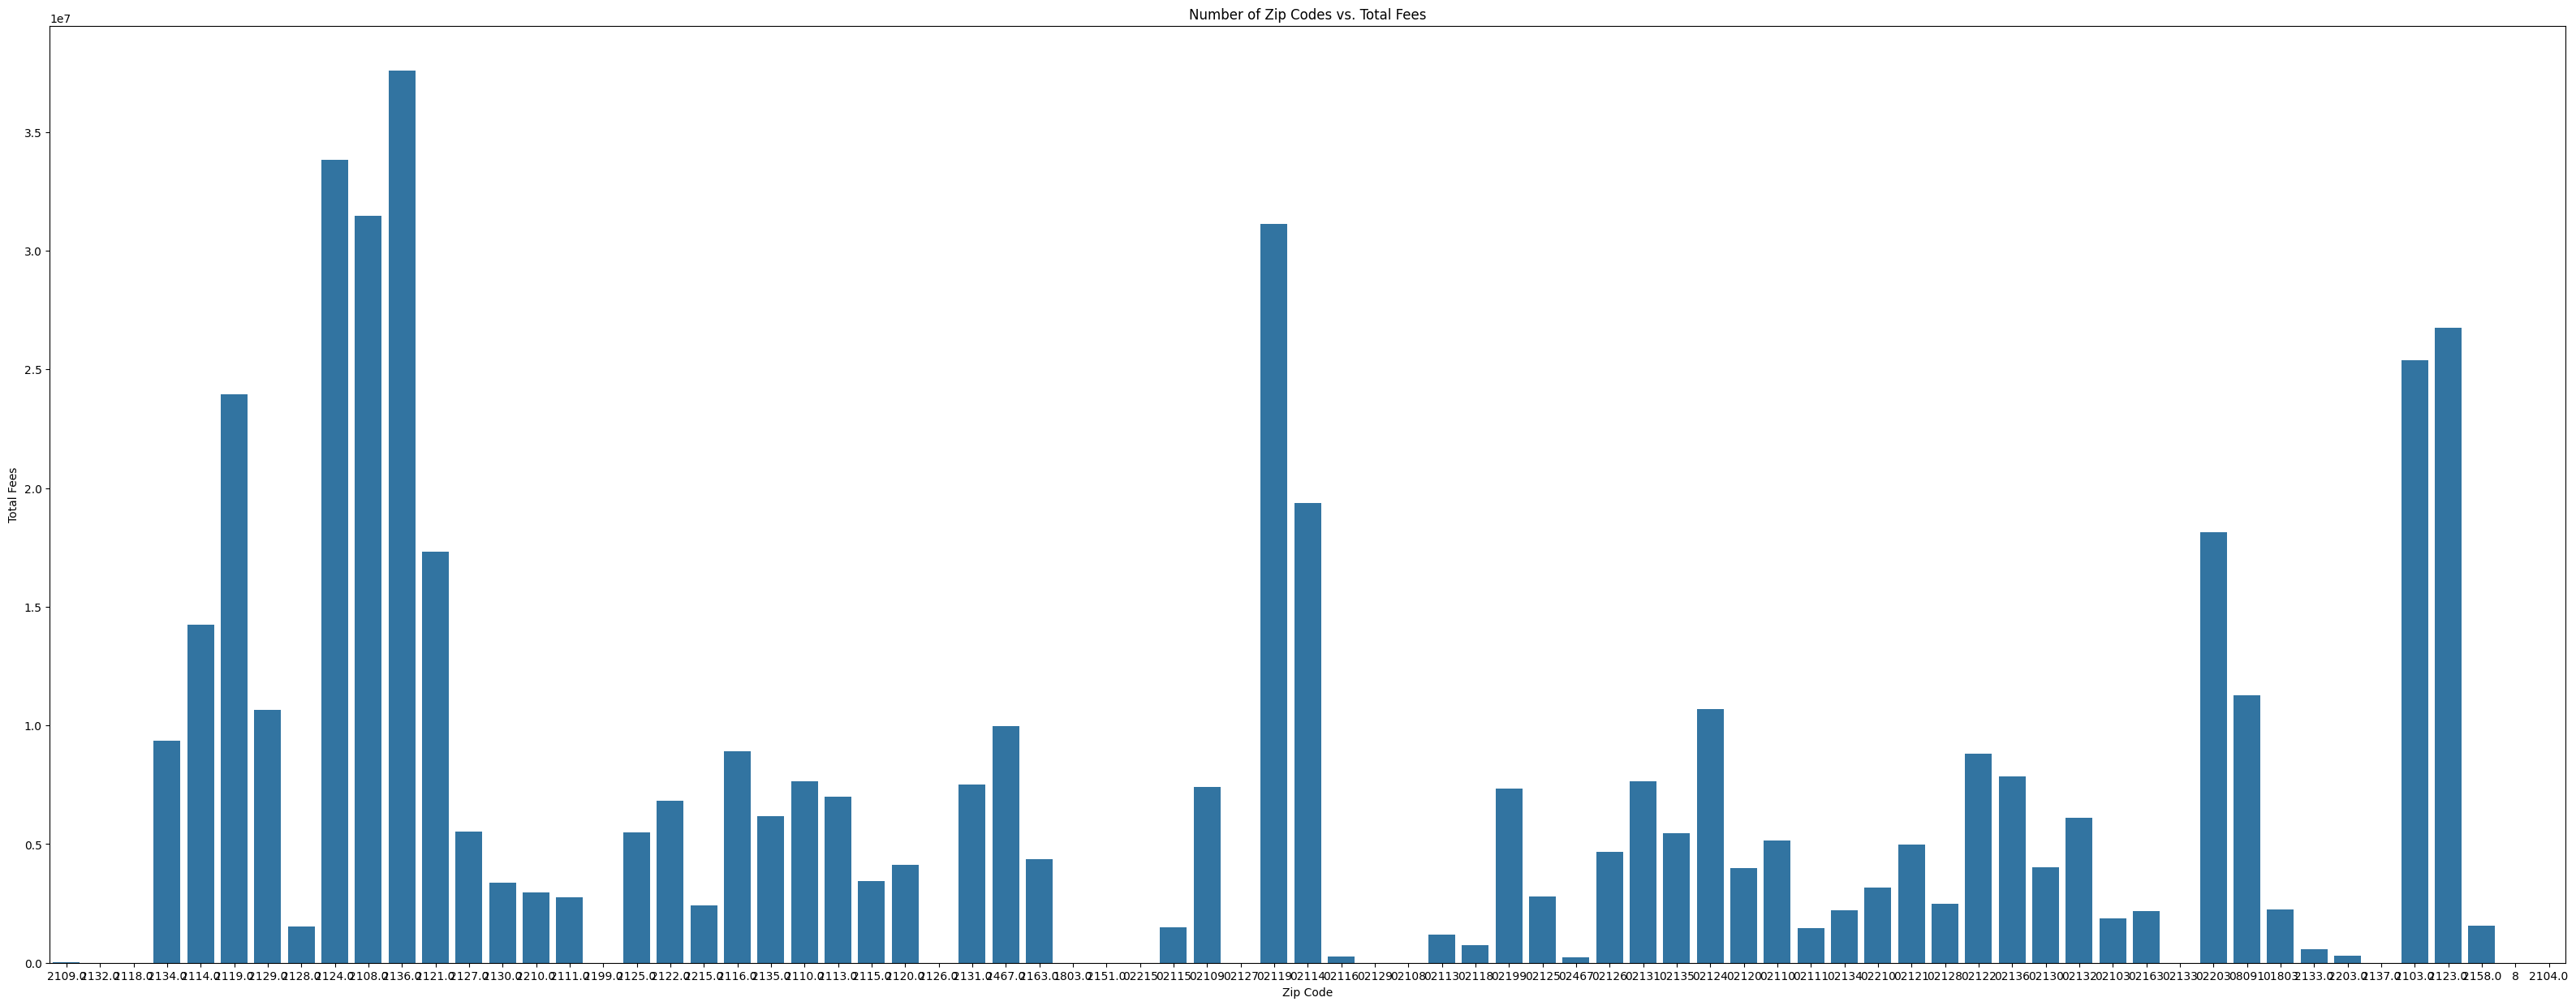

In [43]:
# Bar graph based on the number of zip and total of the each total zip

import matplotlib.pyplot as plt
# Create a bar chart of the number of zip codes vs. the total fees
plt.figure(figsize=(40, 15))
sns.barplot(x=unique_zip_codes, y=zip_totals)
plt.xlabel('Zip Code')
plt.ylabel('Total Fees')
plt.title('Number of Zip Codes vs. Total Fees')
plt.show()


In [44]:
# Graph to find a relationship between zip and total_fees

import matplotlib.pyplot as plt
# Convert 'zip' to a categorical type if it's not already
df['zip'] = df['zip']
# Ensure 'total_fees' is a numeric type
df['total_fees'] = pd.to_numeric(df['total_fees'], errors='coerce')

# Create a scatter plot of zip code vs. total fees
# With categorical data, it might be better to use a boxplot
plt.figure(figsize=(20, 7))
plt.scatter(df['zip'].cat.codes, df['total_fees'])  # Use .cat.codes to assign a numeric code to each unique category
plt.xlabel('Zip Code')
plt.ylabel('Total Fees')
plt.title('Scatter Plot of Zip Code vs. Total Fees')
plt.show()


AttributeError: Can only use .cat accessor with a 'category' dtype

<Figure size 2000x700 with 0 Axes>

In [ ]:
#check based on a certain zip how many "permitnumber" is avaiblable
df['zip'].value_counts()

In [ ]:
# prompt: Give me a density graph for the zip to see where are the zip located

import matplotlib.pyplot as plt
# Calculate the number of permits for each zip code
permits_by_zip = df.groupby('zip')['permitnumber'].count()

# Find the zip code with the most permits
most_permits_zip = permits_by_zip.sort_values(ascending=False).index[0]

# Print the zip code with the most permits and the number of permits
print(f"Zip code with the most permits: {most_permits_zip}")
print(f"Number of permits: {permits_by_zip[most_permits_zip]}")

# Create a bar chart of the number of permits for each zip code
plt.figure(figsize=(40, 15))
sns.barplot(x=permits_by_zip.index, y=permits_by_zip.values)
plt.xlabel('Zip Code')
plt.ylabel('Number of Permits')
plt.title('Number of Permits for Each Zip Code')
plt.show()

# Create a pie chart of the number of permits for each zip code
plt.figure(figsize=(10, 7))
plt.pie(permits_by_zip.values, labels=permits_by_zip.index, autopct='%1.1f%%')
plt.title('Percentage of Permits for Each Zip Code')
plt.show()


In [ ]:

import matplotlib.pyplot as plt
# Create a scatter plot of declared valuation vs. total fees
plt.figure(figsize=(10, 6))
sns.scatterplot(x='declared_valuation', y='total_fees', data=df[df['zip'] == 2116])
plt.xlabel('Declared Valuation')
plt.ylabel('Total Fees')
plt.title('Scatter Plot of Declared Valuation vs. Total Fees for Zip Code 2116')
plt.show()

# Calculate the correlation coefficient between declared valuation and total fees for zip code 2116
correlation = df[df['zip'] == 2116]['declared_valuation'].corr(df[df['zip'] == 2116]['total_fees'])
print(f"Correlation coefficient between declared valuation and total fees for zip code 2116: {correlation}")

# Fit a linear regression model to predict total fees based on declared valuation for zip code 2116
model = LinearRegression()
X = df[df['zip'] == 2116]['declared_valuation'].values.reshape(-1, 1)
y = df[df['zip'] == 2116]['total_fees'].values
model.fit(X, y)

# Make predictions using the linear regression model
y_pred = model.predict(X)

# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue')
plt.plot(X, y_pred, color='red', linestyle='--')
plt.xlabel('Declared Valuation')
plt.ylabel('Total Fees')
plt.title('Linear Regression of Declared Valuation vs. Total Fees for Zip Code 2116')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert 'zip' to numeric (float or int), use errors='coerce' to set invalid parsing as NaN
df['zip'] = pd.to_numeric(df['zip'], errors='coerce')

# Ensure 'total_fees' is numeric as well (this step might be unnecessary if it's already numeric)
df['total_fees'] = pd.to_numeric(df['total_fees'], errors='coerce')

# Drop rows with NaN values in 'zip' or 'total_fees' after conversion
df = df.dropna(subset=['zip', 'total_fees'])

# Now, calculate the correlation coefficient between zip code and total fees
correlation = df['zip'].corr(df['total_fees'])
print(f"Correlation between zip code and total fees: {correlation}")

# Linear regression model can be trained as both 'zip' and 'total_fees' are numeric
model = LinearRegression()
model.fit(df[['zip']], df['total_fees'])  # 'zip' needs to be in a 2D array format
predicted_fees = model.predict(df[['zip']])

# Evaluate the model
mse = mean_squared_error(df['total_fees'], predicted_fees)
print(f"Mean squared error: {mse}")

# Visualize the results
plt.figure(figsize=(20, 7))
plt.scatter(df['zip'], df['total_fees'], alpha=0.5)
plt.plot(df['zip'], predicted_fees, color='red', linewidth=2)
plt.xlabel('Zip Code')
plt.ylabel('Total Fees')
plt.title('Linear Regression of Total Fees by Zip Code')
plt.show()


In [ ]:
df['permitnumber'].value_counts()

In [ ]:
# Check the number of unique occupancytype

, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Check the number of unique occupancy types
unique_occupancy_types = df['occupancytype'].unique()
num_unique_occupancy_types = len(unique_occupancy_types)

# print(f"Number of unique occupancy types: {num_unique_occupancy_types}")
unique_occupancy_types

In [ ]:

import matplotlib.pyplot as plt
, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Count the number of permits for each occupancy type
occupancy_type_counts = df['occupancytype'].value_counts()

# Get the top 6 occupancy types by count
top_6_occupancy_types = occupancy_type_counts.head(7)

# Create a bar chart of the top 6 occupancy types
plt.figure(figsize=(15, 8))
sns.barplot(x=top_6_occupancy_types.index, y=top_6_occupancy_types.values)
plt.xlabel('Occupancy Type')
plt.ylabel('Number of Permits')
plt.title('Number of Permits for Top 6 Occupancy Types')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# The relation between "declared_valuation" and "zip" check if a certain zip have a high declared valuation above 75th percent

import matplotlib.pyplot as plt
# Count the number of permits for each occupancy type
occupancy_type_counts = df.groupby('occupancytype').size().sort_values(ascending=False)

# Print the number of permits for each occupancy type
print(f"Number of permits for each occupancy type:\n{occupancy_type_counts}")

# Create a bar chart of the number of permits for each occupancy type
plt.figure(figsize=(50, 20))
sns.barplot(occupancy_type_counts)
plt.xlabel('Occupancy Type')
plt.ylabel('Number of Permits')
plt.title('Number of Permits for Each Occupancy Type')
plt.show()

# # Check if a certain zip have a high declared valuation above 75th percent
# df['declared_valuation'].describe()
# df['declared_valuation'].quantile(0.75)
# df[df['declared_valuation'] > df['declared_valuation'].quantile(0.75)]['zip'].value_counts()


In [ ]:
df['total_fees'].describe()

In [ ]:
# Generate a normal distribution based on the given data
np.random.seed(0)  # For reproducibility
data = np.random.normal(mean, std, int(count))

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=100, kde=True)
plt.title('Normal Distribution of total_fees')
plt.xlabel('Total Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# The relation between "total_fees" and "zip" check if a certain zip have a high declared valuation above 75th percent

df['total_fees'].quantile(0.50)
df[df['total_fees'] > df['total_fees'].quantile(0.75)]['zip'].value_counts()

# Plot the correlation between declared_valuation and zip
plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x='zip', y='declared_valuation')
plt.ylabel('Declared Valuation')
plt.xlabel('Zip Code')
plt.title('Scatter Plot of Declared Valuation vs. Zip Code')
plt.show()

# Calculate the correlation coefficient between declared_valuation and zip
correlation = df['declared_valuation'].corr(df['zip'])
print(f"Correlation between declared_valuation and zip: {correlation}")

# Check if there is a significant difference in declared_valuation for different zip codes
anova_results = sns.anova(data=df, dv='declared_valuation', between='zip')
print(anova_results)
